In [1]:
import os
import pickle
import pandas

In [2]:
from collections import defaultdict

In [5]:
BASE_PATH = '1527561/attention_weights'

In [6]:
PICKLE_FILE_NAME = 'attention_Test_step_291770.pickle'

In [7]:
path = os.path.join(BASE_PATH, PICKLE_FILE_NAME)

In [8]:
with open(path, 'rb') as f:
    inputs, attention_layers = pickle.load(f)

In [9]:
inputs

{'sess_pid_seq': array([[14711,  9801, 29568, ...,     0,     0,     0],
        [ 9961, 14000, 29096, ...,     0,     0,     0],
        [30588, 28336,     0, ...,     0,     0,     0],
        ...,
        [    8,    55,     0, ...,     0,     0,     0],
        [   72,   162,  6419, ...,     0,     0,     0],
        [   39,    97,   139, ...,     0,     0,     0]])}

In [10]:
inputs_session = {k: list(inputs[k]) for k in inputs}
inputs_session

{'sess_pid_seq': [array([14711,  9801, 29568,  9702,  5756,  1520,  1081, 20122, 18410,
          6216, 11078, 14598,  5574,  1325,  9640, 11020,     0,     0,
             0,     0]),
  array([ 9961, 14000, 29096, 19254, 33646, 28336,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]),
  array([30588, 28336,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]),
  array([21236, 58654,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]),
  array([ 5813, 13285,  3374,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]),
  array([  599,  1054,   553,  2989,  1421,  5813,  2947,  3274, 22804,
          6580, 18430,  4086,  2689,  2636,  3374, 13285,  7802, 24

In [11]:
len(attention_layers)

3

In [12]:
attention_layers[0].shape

(128, 1, 19, 19)

In [13]:
from collections import Counter

In [14]:
import pandas as pd

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5457d25d0>]],
      dtype=object)

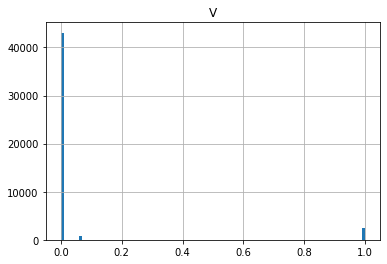

In [15]:
df = pd.DataFrame(attention_layers[0].reshape(-1), columns=['V'])
df.hist(bins=100)

In [16]:
c = Counter(attention_layers[0].reshape(-1))
c

Counter({1.0: 2385, 0.0: 43070, 0.0625: 752, 1.3850676e-29: 1})

In [17]:
inputs['sess_pid_seq'][0]

array([14711,  9801, 29568,  9702,  5756,  1520,  1081, 20122, 18410,
        6216, 11078, 14598,  5574,  1325,  9640, 11020,     0,     0,
           0,     0])

In [18]:
attention_layers[0][0][0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

## Visualizing Attention weights
Reference: https://towardsdatascience.com/beyond-classification-with-transformers-and-hugging-face-d38c75f574fb

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
CMAP = sns.light_palette("blue", n_colors=100)

%matplotlib inline

In [20]:
position_labels = list(range(19))

In [21]:
def get_attentions(outputs, layer=0, attention_head=0, sample_id=0, average_over=None):

  if average_over is None:
      #return values for a particular attention head inside a specific layer, for a sample in the batch
      return outputs[layer][sample_id][attention_head]

  if average_over == 'heads':
    #avg over all heads for the first sample
    return outputs[layer][sample_id].mean(axis=1)

  if average_over == 'samples':
    #avg over all samples
    return outputs[layer].mean(axis=0)[attention_head]

  if average_over == 'samples_and_heads':
    #avg over all samples attention heads in a layer
    return outputs[layer].mean(axis=(0,1))

  #return values for a particular attention head inside a specific layer
  return outputs[layer][0][attention_head]

def plt_attentions(mat, labs, fig_size=(5,5), annot=False, cmap = CMAP, title=None):
  '''
  plot the NxN matrix passed as a heat map
  
  mat: square matrix to visualize
  labs: labels for xticks and yticks (the tokens in our case)
  '''
  fig, ax = plt.subplots(figsize=fig_size) 
  ax = sns.heatmap(mat, annot=annot, yticklabels=labs,xticklabels=labs, cmap=cmap)
  ax.xaxis.set_ticks_position('top')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  if title:
    ax.set_title(title)   

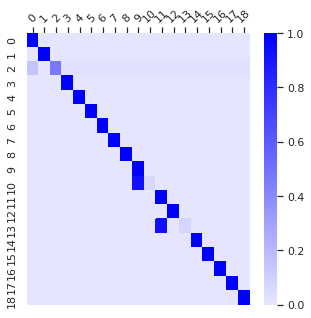

In [22]:
plt_attentions(get_attentions(attention_layers, layer=0, attention_head=0, average_over='samples'), 
               position_labels) 

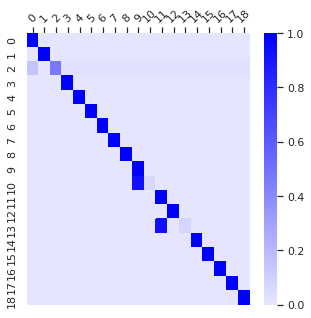

In [23]:
plt_attentions(get_attentions(attention_layers, layer=0, average_over='samples_and_heads'), 
               position_labels) 

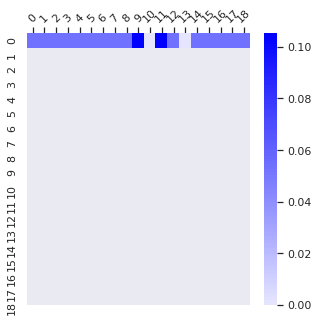

In [24]:
plt_attentions(get_attentions(attention_layers, layer=0, sample_id=1, average_over='heads'), 
               position_labels) 

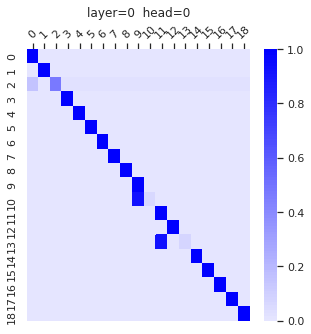

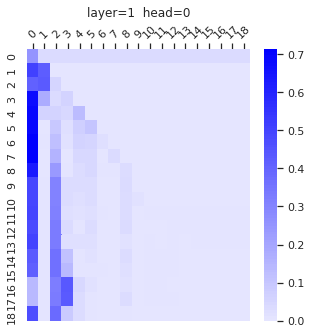

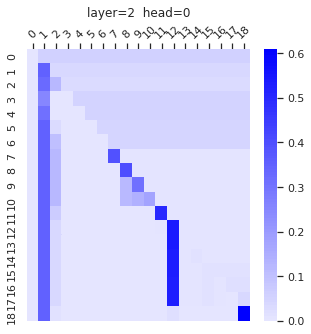

In [25]:
for layer_id in range(len(attention_layers)):
    for attention_head in range(attention_layers[layer_id].shape[1]):
        plt_attentions(get_attentions(attention_layers, 
                                      layer=layer_id, average_over='samples'), 
                       position_labels, title='layer={}  head={}'.format(layer_id, attention_head))

In [26]:
inputs['sess_pid_seq'][3]

array([21236, 58654,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0])

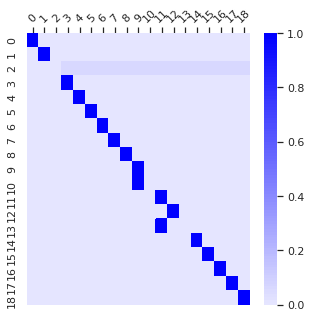

In [27]:
plt_attentions(get_attentions(attention_layers, layer=0, attention_head=0, sample_id=3, average_over=None), 
               position_labels) 

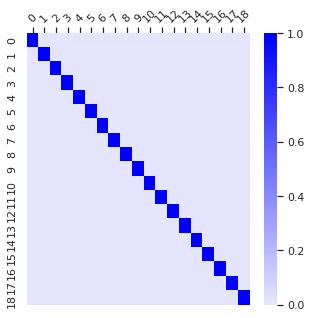

In [29]:
plt_attentions(get_attentions(attention_layers, layer=0, attention_head=0, sample_id=0, average_over=None), 
               position_labels) 

In [30]:
attention_layers[0].shape

(128, 1, 19, 19)

In [31]:
attention_layers[0][0].shape

(1, 19, 19)

In [32]:
inputs['sess_pid_seq'].shape

(128, 20)

In [33]:
inputs['sess_pid_seq'][0]

array([14711,  9801, 29568,  9702,  5756,  1520,  1081, 20122, 18410,
        6216, 11078, 14598,  5574,  1325,  9640, 11020,     0,     0,
           0,     0])

In [34]:
inputs

{'sess_pid_seq': array([[14711,  9801, 29568, ...,     0,     0,     0],
        [ 9961, 14000, 29096, ...,     0,     0,     0],
        [30588, 28336,     0, ...,     0,     0,     0],
        ...,
        [    8,    55,     0, ...,     0,     0,     0],
        [   72,   162,  6419, ...,     0,     0,     0],
        [   39,    97,   139, ...,     0,     0,     0]])}